kelompok: 5

anggota:

1. Agusty labdanayoga /2241720215
2. Icha dewi putriana /2241720069
3. Ikhwandi / 2241720028
4. Rafii ilham maulana /2241720226

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [1]:
# Load required library
# Import Re quired Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=50, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 12
Data dimension: (1560, 62, 47, 3)
Images flatten dimension: (1560, 8742)


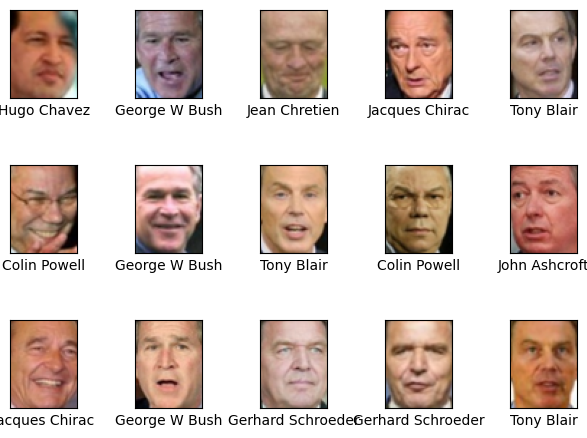

In [ ]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [ ]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''

'\n    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,\n\n    1. Standardisasi nilai fitur ataupun label\n    2. Penyesuaian ukuran gambar\n    3. Perubahan colorspace gambar\n    4. dsb\n'

# Features Extraction

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''


'\n    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.\n    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.\n\n    Hints:\n        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,\n        Anda dapat menggunakan fungsi np.histrogram dari library numpy\n'

In [ ]:
from skimage.feature import hog
from skimage import color
from sklearn.preprocessing import StandardScaler

images = faces.images
y = faces.target
label_names = faces.target_names

# Fungsi untuk mengekstrak fitur HOG dari citra berwarna
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Ekstrak HOG untuk setiap kanal
        hog_features_per_channel = []
        for channel in range(img.shape[2]):
            feature = hog(img[:, :, channel],
                         orientations=9,
                         pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2),
                         block_norm='L2-Hys',
                         transform_sqrt=True,
                         visualize=False,
                         feature_vector=True)
            hog_features_per_channel.append(feature)
        # Gabungkan fitur dari semua kanal
        hog_features.append(np.hstack(hog_features_per_channel))
    return np.array(hog_features)

# Ekstrak fitur HOG
X = extract_hog_features(faces.images)
y = faces.target

print(f'Ekstraksi Fitur HOG selesai. Dimensi fitur: {X.shape}')


Ekstraksi Fitur HOG selesai. Dimensi fitur: (1560, 2592)


# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''

'\n    Pada bagian ini lakukan proses pembuatan model,\n\n    1. Pembuatan data training dan data testing\n    2. Pembuatan objek model\n    3. Proses fitting model\n'

In [ ]:
# import scaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# Pembagian data training dan testing dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi fitur dengan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pembuatan objek model SVM
model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Pelatihan model
model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

'\n    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing\n    dengan menggunakan metric akurasi dan juga classfication report\n\n    Hints:\n        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5\n'

Akurasi Data Training: 99.52%
Akurasi Data Testing: 86.54%
Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.87      0.81      0.84        16
     Colin Powell       0.88      0.98      0.93        47
  Donald Rumsfeld       0.90      0.79      0.84        24
    George W Bush       0.84      0.97      0.90       106
Gerhard Schroeder       0.84      0.73      0.78        22
      Hugo Chavez       1.00      0.43      0.60        14
   Jacques Chirac       1.00      0.60      0.75        10
    Jean Chretien       1.00      0.82      0.90        11
    John Ashcroft       1.00      0.45      0.62        11
Junichiro Koizumi       1.00      0.83      0.91        12
  Serena Williams       0.90      0.90      0.90        10
       Tony Blair       0.76      0.97      0.85        29

         accuracy                           0.87       312
        macro avg       0.92      0.77      0.82       312
     weighted avg       0.88   

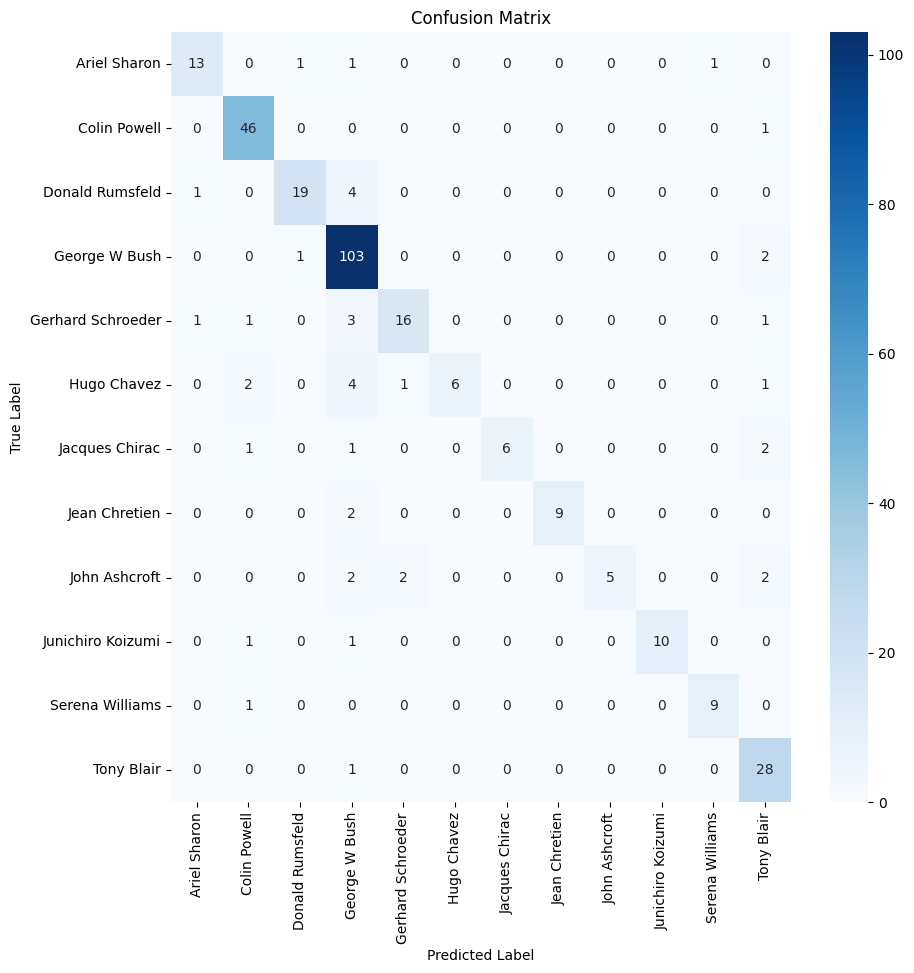

In [ ]:
# Prediksi data testing menggunakan model yang sudah dilatih
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# evaluasi
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Akurasi Data Training: {train_accuracy*100:.2f}%")
print(f"Akurasi Data Testing: {test_accuracy*100:.2f}%")

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=faces.target_names))  # Menampilkan metrik klasifikasi

# Menghitung matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Memvisualisasikan matriks kebingungan
plt.figure(figsize=(10, 10))  # Mengatur ukuran figure
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',  # Menggambar heatmap untuk matriks kebingungan
             xticklabels=faces.target_names, yticklabels=faces.target_names)  # Menambahkan label
plt.xlabel('Predicted Label')  # Label untuk sumbu x
plt.ylabel('True Label')  # Label untuk sumbu y
plt.title('Confusion Matrix')  # Judul untuk plot
plt.show()  # Menampilkan plot

## **Challenge**

menggunakan fitur HOG dan menggunakan model Log Regression

In [ ]:
from skimage.feature import hog
from skimage import color
from sklearn.preprocessing import StandardScaler

images = faces.images
y_chall = faces.target
label_names = faces.target_names

# Fungsi untuk mengekstrak fitur HOG dari citra berwarna
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Ekstrak HOG untuk setiap kanal
        hog_features_per_channel = []
        for channel in range(img.shape[2]):
            feature = hog(img[:, :, channel],
                         orientations=9,
                         pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2),
                         block_norm='L2-Hys',
                         transform_sqrt=True,
                         visualize=False,
                         feature_vector=True)
            hog_features_per_channel.append(feature)
        # Gabungkan fitur dari semua kanal
        hog_features.append(np.hstack(hog_features_per_channel))
    return np.array(hog_features)

# Ekstrak fitur HOG
X_chall = extract_hog_features(faces.images)
y_chall = faces.target

print(f'Ekstraksi Fitur HOG selesai. Dimensi fitur: {X.shape}')


Ekstraksi Fitur HOG selesai. Dimensi fitur: (1560, 2592)


In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi train dan test (80% train, 20% test)
X_train_chall, X_test_chall, y_train_chall, y_test_chall = train_test_split(X_chall, y_chall, test_size=0.2, random_state=42, stratify=y_chall)

print(f'Jumlah data train: {X_train.shape[0]}')
print(f'Jumlah data test: {X_test.shape[0]}')


Jumlah data train: 1248
Jumlah data test: 312


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Standarisasi fitur
scaler = StandardScaler()
X_train_chall = scaler.fit_transform(X_train_chall)
X_test_chall = scaler.transform(X_test_chall)

# Menggunakan Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)  # max_iter untuk konvergensi
logreg_model.fit(X_train_chall, y_train_chall)

# Melakukan prediksi
y_train_pred_chall = logreg_model.predict(X_train_chall)
y_test_pred_chall = logreg_model.predict(X_test_chall)


Akurasi Data Training: 100.00%
Akurasi Data Testing: 88.14%
Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.82      0.88      0.85        16
     Colin Powell       0.88      0.96      0.92        47
  Donald Rumsfeld       0.91      0.83      0.87        24
    George W Bush       0.92      0.96      0.94       106
Gerhard Schroeder       0.79      0.68      0.73        22
      Hugo Chavez       0.90      0.64      0.75        14
   Jacques Chirac       0.80      0.80      0.80        10
    Jean Chretien       1.00      0.82      0.90        11
    John Ashcroft       0.80      0.73      0.76        11
Junichiro Koizumi       0.90      0.75      0.82        12
  Serena Williams       0.82      0.90      0.86        10
       Tony Blair       0.84      0.93      0.89        29

         accuracy                           0.88       312
        macro avg       0.87      0.82      0.84       312
     weighted avg       0.88  

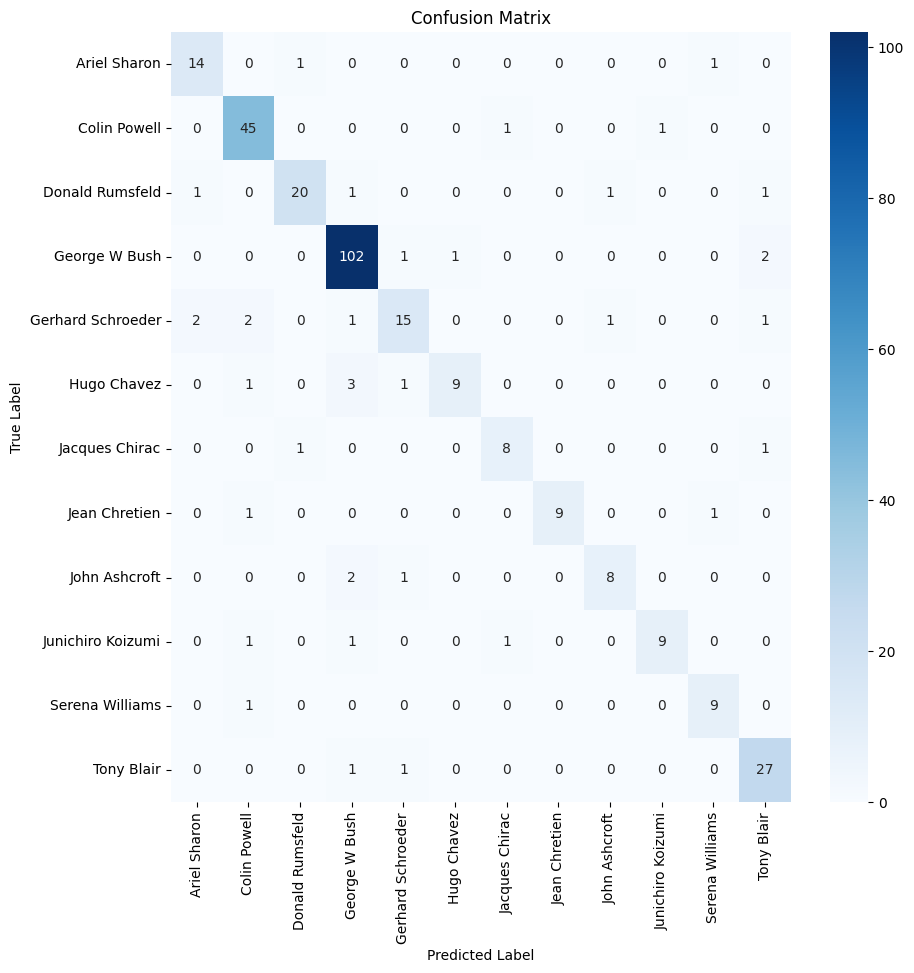

In [ ]:
# evaluasi
train_accuracy = accuracy_score(y_train_chall, y_train_pred_chall)
test_accuracy = accuracy_score(y_test_chall, y_test_pred_chall)

print(f"Akurasi Data Training: {train_accuracy*100:.2f}%")
print(f"Akurasi Data Testing: {test_accuracy*100:.2f}%")

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test_chall, y_test_pred_chall, target_names=faces.target_names))  # Menampilkan metrik klasifikasi

# Menghitung matriks kebingungan
conf_matrix = confusion_matrix(y_test_chall, y_test_pred_chall)

# Memvisualisasikan matriks kebingungan
plt.figure(figsize=(10, 10))  # Mengatur ukuran figure
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',  # Menggambar heatmap untuk matriks kebingungan
             xticklabels=faces.target_names, yticklabels=faces.target_names)  # Menambahkan label
plt.xlabel('Predicted Label')  # Label untuk sumbu x
plt.ylabel('True Label')  # Label untuk sumbu y
plt.title('Confusion Matrix')  # Judul untuk plot
plt.show()  # Menampilkan plot